In [1]:
# ************************************************
# CREDIT CARD FRAUD DETECTION 
# - EDA, Preparing data for modeling, Predict using Models ,Results
#
# Based on real-world dataset
#
# DATE: 1st November 2022
# VERSION: v1.6
# AUTHOR: Adarsh Manoj,Piyush Patel,Abubakar Sani,Ramandeep Singh
#
#
# UPDATE
# 1.0 - 1/11/2022 -  Initial Version
# 1.1  - 8/11/2022 -  EDA
# 1.2  - 13/11/2022 - Pre Processing
# 1.3  - 16/11/2022 - Modeling
# 1.4  - 22/11/2022 - Tuning
# 1.5  - 24/11/2022 - Results
# 1.6  - 26/11/2022 - Final Changes and Commenting
# ************************************************

In [2]:
# clearing all global environment variables
rm(list=ls())

In [3]:
#Constant Varibles:
DATASET<-"creditcard.csv"    #name of dataset on which we will be working

HOLDOUT<-0.7  #% split of Training Data
SAMPLINGP<-0.5 # p value used in sampling

DISCRETE_BINS<-50 # no. of empty bins to determine discrete

CLASSTRUE<-1 # Class variable 1
CLASSFALSE<-0 # Class varibale 0

KFOLDNUMBER<-10 # folds for cross validation

#Defining Global Variables
Global_df<-NULL
Global_test<-NULL
Global_train<-NULL

In [4]:
#*********************************************************
#Define the libraries used in this project
# Library from CRAN          Version
#  dplyr                     1.0.10
#  ggplot2                   3.4.0
#  ROSE                      0.0-4
#  e1071                     1.7-12
#  caret                     6.0-93
#  rpart                     4.1.19
#  PRROC                     1.3.1              
#  reshape2                  1.4.4
#  pacman                    0.5.1


In [5]:
# ***********************************
#installLoadLibraries() : loading all the relevant Packages
# INPUT  : NONE
# OUPUT  : NONE
#
#**********************************
installLoadLibraries<-function(){
    #Libraries used in this project
    MYLIBRARIES<-c("dplyr","ggplot2","ROSE","e1071","caret","rpart","PRROC","reshape2")
    
    #installing pacman for managing packages
    install.packages("pacman",dependencies=TRUE)
    
    #installation and loading of packages
    library(pacman)
    pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)
    print(" Libraries Loaded Succesfully Loaded ")
    
}

In [6]:
# Get the versions of all packages  
#sessionInfo()

In [7]:
# ***********************************
#readDataSet(filename) : loading the data file
# INPUT  : File Name
# OUPUT  : DataFrame Cotaining data
#
#**********************************
readDataSet<-function(filename){
    df<-read.csv(filename,header=TRUE)
    print(paste(" Dataset ",filename," Succesfully Loaded ","with ",nrow(df)," rows ","and ",ncol(df)," columns"))
    return(df)
}

In [8]:
# ********************** **************************
# mainEDA() :entry point EDA Credit Card Fraud Detection
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainEDA<-function(){
    #Get data types
    str(Global_df)
    
    #Statistics of data
    summary(df)
    
    #Total fraud and non-fraud transactions
    totalFraud<-sum(Global_df$Class)
    totalNonFraud<-sum(Global_df$Class==CLASSFALSE)
    print(paste("Fraud = ",totalFraud))
    print(paste("Non Fraud = ",totalNonFraud))
    
    
    Amount<-Global_df$Amount
    Time<-Global_df$Time
    Amount<-data.frame(Amount)
    Time<-data.frame(Time)
    
    #seperating dataframe for fraud and non fraud transaction
    non_fraud <- Global_df %>% filter(Class == CLASSFALSE)
    df_fraud <- Global_df %>% filter(Class == CLASSTRUE)
    
    writeLines("\n\n")
    #Plotting fraud and non fraud transactions
    Class<-Global_df$Class
    Class<-data.frame(Class)
    
    writeLines("\n\n")
    print(ggplot(Class,aes(x=Class))+geom_bar()+labs(x = "Fraud and Non-Fraud Class",y = "Total No. of Transaction",title= "Distribution of Class"))
    
    #analysis of target variable
    targetVariableAnalysis()
    
    #check whether data is discrete or continuous
    
    #correlation Matrix
    correlationMatrix()
    
    #other graphs
    writeLines("\n\n Plotting the Graph Fraud against Amount")
    #plot the graph of fraud against amount
    print(ggplot(df_fraud,aes(Amount))+geom_histogram(bin=DISCRETE_BINS))
    
    
    writeLines("\n\n Plotting the Graph Non-Fraud against Amount")
    #plot the graph of non fraud against amount
    print(ggplot(non_fraud,aes(Amount))+geom_histogram(bin=DISCRETE_BINS))
    
    writeLines("\n\n Plotting the Fraud Transactions against Amount")
    #plotting the graph for fraud transaction against time and amount
    print(ggplot(df_fraud, aes(x=Time,y=Amount))+geom_point())
    
    writeLines("\n\n Plotting the Non-Fraud Transactions against Amount")
    #plotting the graph for non fraud transaction against time and amount
    print(ggplot(non_fraud, aes(x=Time,y=Amount))+geom_point())
    
    
    
    } # endof mainEDA()

In [9]:
# ********************** **************************
# targetVariableAnalysis() :Analysis of Target Variable used in EDA
# INPUT: None
# OUTPUT :None
# ************************************************

#plotting the Amount variable
targetVariableAnalysis<-function(){
    
    
    Amount<-Global_df$Amount
    Time<-Global_df$Time
    Amount<-data.frame(Amount)
    Time<-data.frame(Time)
    
 
    
    writeLines("\n Summary of Amount \n")
    summary(Amount)

    writeLines("\nNow we are gonna plot the Amount variable to check for distribution\n")
    print(ggplot(Amount,aes(Amount))+geom_histogram(bins=DISCRETE_BINS)+labs(x = "Amount in $ ",y = "Frequency",title= "Distribution of Transaction Amount"))

    writeLines("\nWe see that the data is skewed towards left side, but we need a normalised data.\n")
    print(ggplot(Amount,aes(Amount)) +geom_histogram(bins=DISCRETE_BINS)+scale_x_log10() +labs(x = "Amount in $ ",y = "Frequency",title= "Distribution of Transaction Amount"))
    
    
    #check whether data is discrete or continuous
    
    writeLines("\nPlot the data of Time distribution\n")
    print(ggplot(Time)+geom_qq(aes(sample=Time))+labs(x = "Time interval ",y = "Frequency",title= "Time Distribution"))

  
    
}# endof targetVariableAnalysis()

In [10]:
# ********************** ********************************************
# CorrelationMatrix() :Correlation Matrix of the dataset used in EDA
# INPUT: None
# OUTPUT :None
# ********************************************************************
correlationMatrix<-function(){
    #HeatMaps
    #Preparing the data
    #correlation Matrix
    corrmatrix<-round(cor(Global_df),2)
 
    #melted Correaltion matrix
    meltedcorrmat<-melt(corrmatrix)

    #print Melted Correaltion matrix
    head(meltedcorrmat)

    #we will try to find the pairs having coeficient greater than 0.5
    df_corr<-data.frame(corrmatrix)
    df_corr[(abs(df_corr) >= 0.5) & (abs(df_corr) !=1)]
    
    
    #Plotting the correlation matrix
    
    writeLines("\nCorrelation Matrix\n")
    print(ggplot(data = meltedcorrmat, aes(Var2, Var1, fill = value))+geom_tile(color = "white")+scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1), space = "Lab", name="Correlation") +theme_minimal()+ theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1))+coord_fixed()+geom_text(aes(Var2, Var1, label = value),color = "black", size = 2))

    
    
    
}# end of correlationMatrix()

In [11]:
# ********************** **************************
# dataAfterSampling() :Checking the data after sampling used in Pre-Processing
# INPUT: sampledData: Sampled Data Frame 
# OUTPUT :None
# ************************************************

#plotting the Amount variable
dataAfterSampling<-function(sampledData){
    
    data_balanced<-sampledData
    ## Check class distribution after sampling
    
    data_balanced %>% group_by(Class) %>%
    summarise(cnt = n()) %>%
    mutate(freq = round(cnt / sum(cnt), 5)) %>% 
    arrange(desc(freq))
    
    
    
    
    
}# end of dataAfterSampling()

In [12]:
# ********************** **************************
# dataSampling() :Using Sampling for class balance used in Pre-Processing
# INPUT: None
# OUTPUT :Sampled Data
# ************************************************

#plotting the Amount variable
dataSampling<-function(){
    ## now using ROSE for sampling
    sampledData<- ovun.sample(Class ~., data=Global_df,p=SAMPLINGP, seed=1,method="over")
    df<-sampledData$data
    return(df)
}# end of dataSampling()

In [13]:
# ************************************************
# removeDuplicateRows() :Removing the duplicate rows from the data frame
# INPUT: None
# OUTPUT :Data with duplicate rows removed
# ************************************************
removeDuplicateRows<-function(){
    
# Check for duplicate rows and removing them
    df<-Global_df[!duplicated(Global_df),]
    duplicateRows<-284807-nrow(df)                      
    writeLines(paste("\n\nTotal Number of Duplicate Rows Removed : ",duplicateRows))
    return(df)
}# end of removeDuplicateRows()

In [14]:
# ********************** **************************
# mainPreProcessing() :Pre-Processing of Data
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainPreProcessing<-function(){
    head(Global_df)
    
    
    #Checking for any null values
    sm<-sum(is.null(df))
    writeLines(paste("\n\nTotal Number of Null Values = ",sm))
    
    #removing all the duplicate values
    df<-removeDuplicateRows()          
    
    
               
    #scale for feature engineering
    Global_df$Amount<-scale(Global_df$Amount)
    
    
    #sampling
    df<-dataSampling()
    
    #results of sampling
    dataAfterSampling(df)
    
    #Setting Target Variable to factor
    df$Class <- as.factor(df$Class)
    
    #Assigning sampled data to Global Data
    Global_df<<-df
    
    #reducing Dimentionality
    mainDimReduction()
    
    
} # endof mainPreProcessing()

In [15]:
#***********************************************************************
# pcaCharts(X): PCA attempts to find the charts of principal components (or features) as its names denote.
#
# INPUT : Class variable
#
# OUTPUT : charts of Proportions of variance w.r.t Principle Components
#
# *************************************************************************
# Function to check Variance explained
pcaCharts <- function(x) {
    x.var <- x$sdev ^ 2
    x.pvar <- x.var/sum(x.var)
    print("proportions of variance:")
    print(x.pvar)
    
    par(mfrow=c(2,2))
    plot(x.pvar,
         xlab="Principal component", 
         ylab="Proportion of variance explained", 
         ylim=c(0,1), type='b')
    plot(cumsum(x.pvar),
         xlab="Principal component", 
         ylab="Cumulative Proportion of variance explained", 
         ylim=c(0,1), type='b')
    screeplot(x)
    screeplot(x,type="l")
    par(mfrow=c(1,1))
    
}# end of PcaCharts()

In [16]:
# ********************** **************************
# mainDimReduction() :Dimensionality Reduction 
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainDimReduction<-function(){
    
    
    # Seperating features from target variable
    X <- subset(Global_df, select = -c(Class)) 
    
    #error here 
    #Error in subset.default(df, select = -c(Class)): argument "subset" is missing, with no default


    
    
    #reducing dim of Class with PCA
    pca <- prcomp(X, scale. = TRUE)
    pcaCharts(pca)
    
    # Calculate Explained Variance
    pca_var <- round((pca$sdev^2)/sum(pca$sdev^2) * 100, 1) 
    n_pc <- seq(1, length(pca_var))
    pca_df <- data.frame(pca_var, n_pc)

    #Graph of explained variance
    pca_df %>% ggplot(aes(x = n_pc, y = pca_var)) +geom_bar(stat = 'identity') +labs(title = "PCA Variation Plot",xlab = "PCs",ylab = "Prop. of variance explained",ylim = c(0, 100))
    
    
    # SVD for dim reduction
    svd <- svd(X)
    
    # Calculate Explained Variance
    svd_var <- round(svd$d^2/sum(svd$d^2) * 100, 4) 
    n_pc <- seq(1, length(svd_var))
    svd_df <- data.frame(svd_var, n_pc)

    # Graph of explained variance
    svd_df %>% ggplot(aes(x = n_pc, y = svd_var)) +geom_bar(stat = 'identity') +labs(title = "SVD Variation Plot",xlab = "PCs",ylab = "Prop. of variance explained",ylim = c(0, 100))
    
    # Consolodiating PCA transformed dataframe
    X_pca <- as.data.frame(pca$x[, 1:5])
    y <- subset(Global_df, select = c(Class))
    df_pca <- cbind(X_pca, y)
    
    #Partitioning train-test split
    index <- createDataPartition(y = df_pca$Class, p = HOLDOUT, times = 1, list = FALSE)
    train <- df_pca[index,]
    test  <- df_pca[-index,]
    
    #Assigning test and train data to Global test and Global test respectivly.
    Global_test<<-test
    Global_train<<-train
    
} # endof Dim Reduction()

In [17]:

# ********************** **********************************
# logisticTrain(train) :train the model using training data 
# INPUT: training data
# OUTPUT :trained model
# **********************************************************
logisticTrain<-function(train){
    
    kfold_cv <- trainControl(method = "cv",  number = 3, savePredictions = T)
    
    logreg_model <- train(form=Class~., data = train,method="glm", family="binomial",trControl=kfold_cv, tuneLength=3)
    print(summary(logreg_model))
    return(logreg_model)
    
}# end of logisticTrain

# ********************** **********************************
# decisionTrain(train) :train the model using training data 
# INPUT: training data
# OUTPUT :trained model
# **********************************************************
decisionTrain<-function(train){
    tree <- rpart(Class ~ ., data = train, method = "class",control=rpart.control(xval=3))
    print(summary(tree))
    return(tree)
}# end of decisionTrain

# ********************** **********************************
# randomForestTrain(train) :train the model using training data 
# INPUT: training data
# OUTPUT :trained model
# **********************************************************
randomForestTrain<-function(train){
   kfold_cv <- trainControl(method = "cv",  number = KFOLDNUMBER, savePredictions = T)
    forest <- train(
        
        # Formula. We are using all variables to predict Species
        Class~., 
        
        # Source of data; remove the Species variable
        data=train, 
        
        # `rf` method for random forest
        method='rf', 
        
        #min tree
        mtry=3,
        
        maxdepth=10,
        
        
        # Add repeated cross validation as trControl
        trControl=kfold_cv,
        
        # Accuracy to measure the performance of the model
        metric='Accuracy')

    
    return(forest)
} # end of randomForestTrain

In [18]:
#
# ********************** **************************
# predictionTestLR(preds,test) :Predict the results using model and test data 
# INPUT: predictive Model,testing data
# OUTPUT :NONE
# ***********************************************
predictionTestLR<-function(pred_model,test){
    #logistic Regression    
    preds <- predict(pred_model, test, type="prob")[,2] #prob of positive class
    return(preds)
}# end of predictionTestLR()


# ********************** **************************
# predictionTestDT(preds,test) :Predict the results of Decision Tress using model and test data 
# INPUT: predictive Model,testing dat
# OUTPUT :NONE
# ***********************************************
predictionTestDT<-function(pred_model,test){
    pred <- predict(pred_model, test, type="class")
    return(pred)

}# end of predictionTestDT()

# ********************** **************************
# predictionTestDT(preds,test) :Predict the results of Random Forest using model and test data 
# INPUT: predictive Model,testing data
# OUTPUT :NONE
# ***********************************************
predictionTestRF<-function(pred_model,test){
    pred <- predict(pred_model, test)
    return(pred)
} # end of predictionTestRF()

In [19]:
#
# ********************** **************************
# predictionResultsLR(preds,test,modelName) :Display the results using model and test data 
# INPUT: predictive Model,testing data,model name
# OUTPUT :NONE
# ************************************************
predictionResultsLR<-function(preds,test,modelName){
    
   
    preds_pos <- preds[test[,6]==1] #preds for true positive class
    preds_neg <- preds[test[,6]==0] #preds for true negative class
   
    writeLines(paste("\n\n ROC-AUC - ",modelName))
    PRC <- pr.curve(preds_pos, preds_neg, curve=TRUE)
    print(plot(PRC))
    
    
    writeLines(paste("\n\nPrecision,Recall and F1-Score - ",modelName))
    dt_db_test<- factor(ifelse(preds> 0.50,1,0))
    
    precision_dtdb <- posPredValue(dt_db_test,test$Class,positive = 1)
    recall_dtdb <- sensitivity(dt_db_test,test$Class,positive = 1)
    F1_dtdb <- (2 * precision_dtdb * recall_dtdb) / (precision_dtdb + recall_dtdb)
    print(paste("Precsion : ",precision_dtdb))
    print(paste("Recall : ",recall_dtdb))
    print(paste("F1-Score : ",F1_dtdb))
    
    writeLines(paste("\n\nConfusion Matrix - ",modelName))
    print(confusionMatrix(dt_db_test, test$Class, positive = '1'))
    
}# end of predictionResultsLR()

# ********************** **************************
# predictionResults(preds,test,modelName) :Predict the results using model and test data 
# INPUT: training data,testing data and Model name
# OUTPUT :NONE
# ************************************************

predictionResults<-function(preds,test,modelName){
    
   
    preds_pos <- preds[test[,6]==1] #preds for true positive class
    preds_neg <- preds[test[,6]==0] #preds for true negative class
   
    writeLines(paste("\n\n ROC-AUC - ",modelName))
    PRC <- pr.curve(preds_pos, preds_neg, curve=TRUE)
    print(plot(PRC))
    
    
    writeLines(paste("\n\nPrecision,Recall and F1-Score - ",modelName))
    
    
    precision_dtdb <- posPredValue(preds,test$Class,positive = 1)
    recall_dtdb <- sensitivity(preds,test$Class,positive = 1)
    F1_dtdb <- (2 * precision_dtdb * recall_dtdb) / (precision_dtdb + recall_dtdb)
    print(paste("Precsion : ",precision_dtdb))
    print(paste("Recall : ",recall_dtdb))
    print(paste("F1-Score : ",F1_dtdb))
    
    writeLines(paste("\n\nConfusion Matrix - ",modelName))
    print(confusionMatrix(preds, test$Class, positive = '1'))
} # end of predictionResults()

In [20]:
#
# ********************** **************************
# modelDeclarationLR(train,test) :execute Logistic Regression Model 
# INPUT: training and testing data
# OUTPUT :NONE
# ************************************************
modelDeclarationLR<-function(train,test){  
            
    logreg_model<-logisticTrain(train)
    
    predLR<-predictionTestLR(logreg_model,test)
    
    resultLR<-predictionResultsLR(predLR, test, "Logistic Regression")
    
} #modelDeclarationLR

# ********************** **************************
# modelDeclarationDT(train,test) : execute Decision Tress Model
# INPUT: training and testing data
# OUTPUT :NONE
# ************************************************

modelDeclarationDT<-function(train,test){
    
    decision_model<-decisionTrain(train)

    predDT<-predictionTestDT(decision_model,test)

    resultDT<-predictionResults(predDT, test, "Decisition Tree")
    
}# end of modelDeclarationDT

# ********************** **************************
# modelDeclarationRF(train,test) : execute Random Forest Model
# INPUT: training and testing data
# OUTPUT :NONE
# ************************************************
modelDeclarationRF<-function(train,test){
    
    random_forest_model<-randomForestTrain(train)
    
    predRF<-predictionTestRF(random_forest_model,test)
    
    resultRF<-predictionResults(predRF, test, "Random Forest")
    
}#end of modelDeclarationRF()

In [21]:
# ********************** **************************
# mainModeling() :entry point of Modeling Credit Card Fraud Detection
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainModeling<-function(){
    
   
    
    
    test<-Global_test
    train<-Global_train
    test<-data.frame(test)
    train<-data.frame(train)
    
    modelDeclarationLR(train,test)
    modelDeclarationDT(train,test)
    #modelDeclarationRF(train,test)
    
    
}# end of mainModeling()


In [22]:
# ********************** **************************
# mainPerformanceEvaluation() :Model Perfromance using Precision Recall and F1 score
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainPerformanceEvaluation<-function(){
    #K-fold cross validation
   
precision_both <- posPredValue(dt_dbsmote_test,test$Class,positive = "yes")
recall_both <- sensitivity(dt_dbsmote_test,test$class,positive = "yes")
F1_both <- (2 * precision_dtdbsmote * recall_dtdbsmote) / (precision_dtdbsmote + recall_dtdbsmote)
} # endof mainPerformanceEvaluation()

In [23]:
# ********************** **************************
# mainResults() :entry point to execute the ML data analytics
# INPUT: None
# OUTPUT :None
# ************************************************
 
#This keeps all variables as local to this function
mainResults<-function(){
# AUC for each results 
} # endof mainResults()

In [ ]:
# ************************************************
#  Start of Running the functions to run the model
# ************************************************

In [24]:
 #LOAD LIBRARIES
installLoadLibraries()

Installing package into 'C:/Users/639pi/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'pacman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\639pi\AppData\Local\Temp\RtmpwZao4n\downloaded_packages
[1] " Libraries Loaded Succesfully Loaded "


In [25]:
writeLines("\nload Dataset\n") 
df<-readDataSet(DATASET)
#Assigning global data variable
Global_df<<-df


load Dataset

[1] " Dataset  creditcard.csv  Succesfully Loaded  with  284807  rows  and  31  columns"


In [26]:
writeLines("\nHead DATA\n")
print(head(df))
    


Head DATA

  Time         V1          V2        V3         V4          V5          V6
1    0 -1.3598071 -0.07278117 2.5363467  1.3781552 -0.33832077  0.46238778
2    0  1.1918571  0.26615071 0.1664801  0.4481541  0.06001765 -0.08236081
3    1 -1.3583541 -1.34016307 1.7732093  0.3797796 -0.50319813  1.80049938
4    1 -0.9662717 -0.18522601 1.7929933 -0.8632913 -0.01030888  1.24720317
5    2 -1.1582331  0.87773675 1.5487178  0.4030339 -0.40719338  0.09592146
6    2 -0.4259659  0.96052304 1.1411093 -0.1682521  0.42098688 -0.02972755
           V7          V8         V9         V10        V11         V12
1  0.23959855  0.09869790  0.3637870  0.09079417 -0.5515995 -0.61780086
2 -0.07880298  0.08510165 -0.2554251 -0.16697441  1.6127267  1.06523531
3  0.79146096  0.24767579 -1.5146543  0.20764287  0.6245015  0.06608369
4  0.23760894  0.37743587 -1.3870241 -0.05495192 -0.2264873  0.17822823
5  0.59294075 -0.27053268  0.8177393  0.75307443 -0.8228429  0.53819555
6  0.47620095  0.26031433 -0.56


EDA

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ..

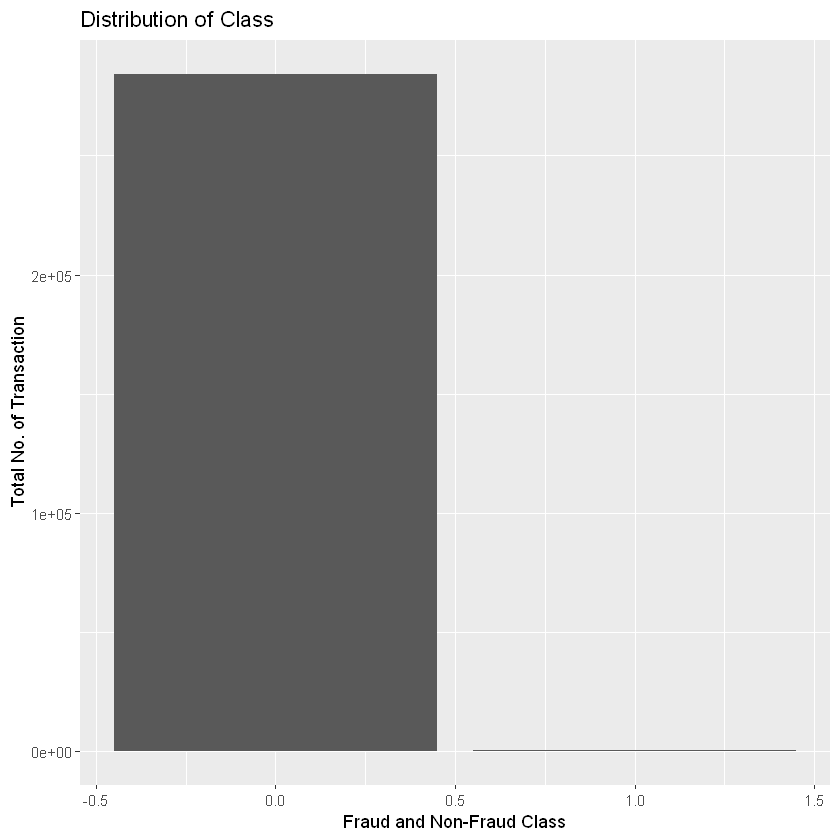


We see that the data is skewed towards left side, but we need a normalised data.



Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1825 rows containing non-finite values (`stat_bin()`)."


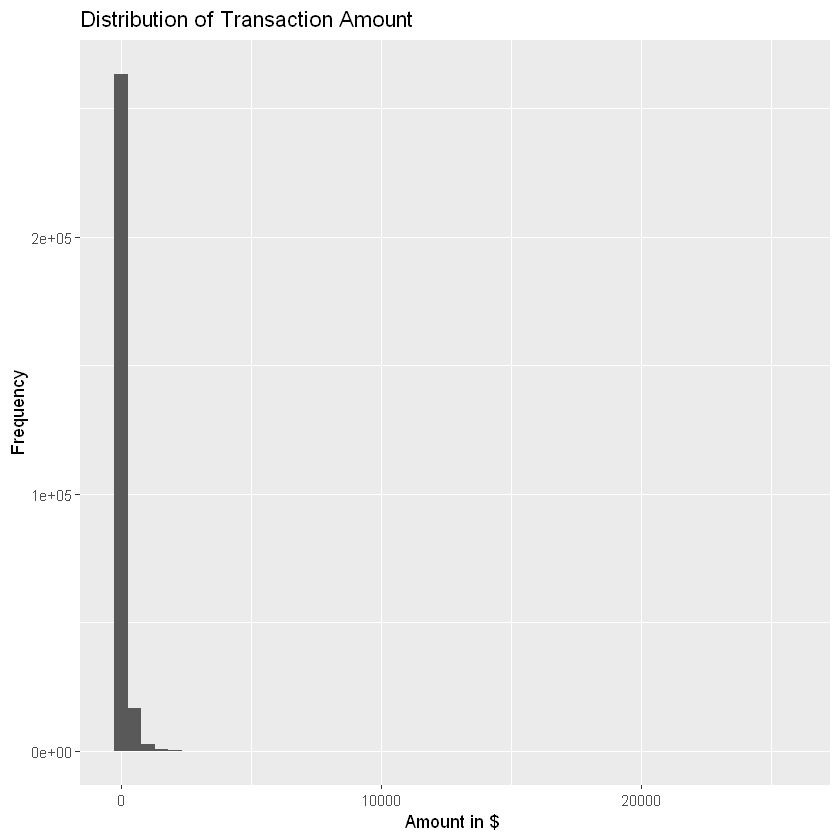


Plot the data of Time distribution



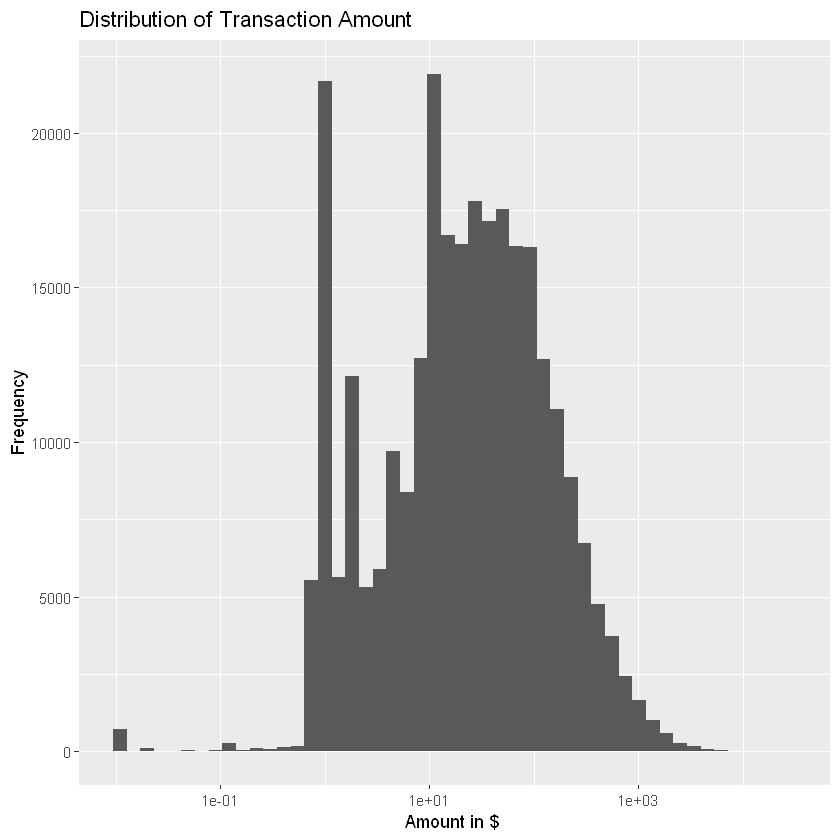


Correlation Matrix



 Plotting the Graph Fraud against Amount


Warning message in geom_histogram(bin = DISCRETE_BINS):
"Ignoring unknown parameters: `bin`"


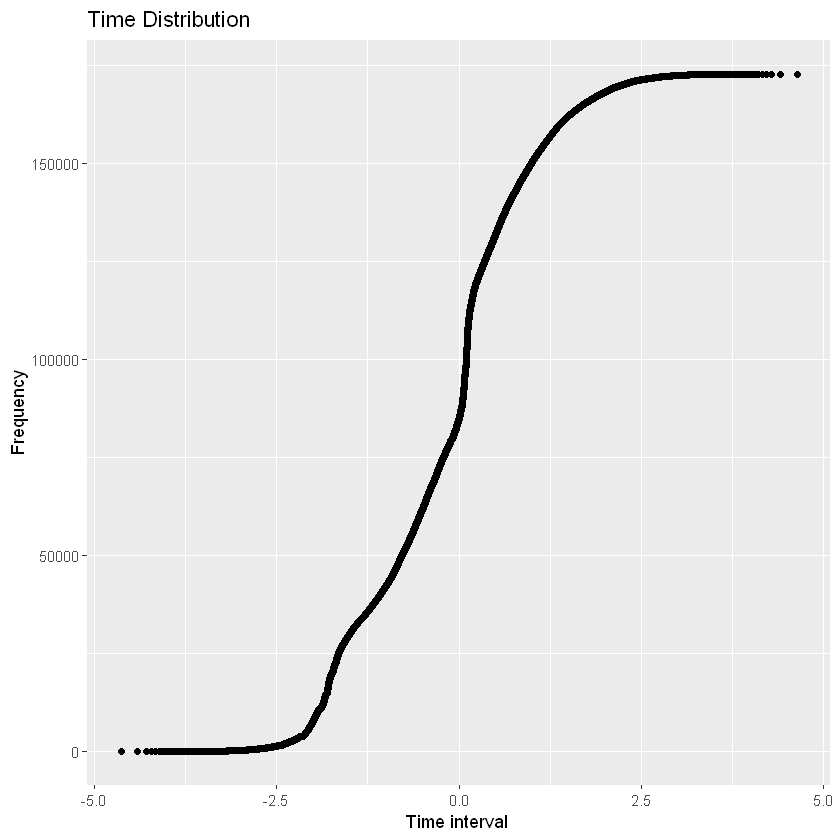

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.




 Plotting the Graph Non-Fraud against Amount


Warning message in geom_histogram(bin = DISCRETE_BINS):
"Ignoring unknown parameters: `bin`"


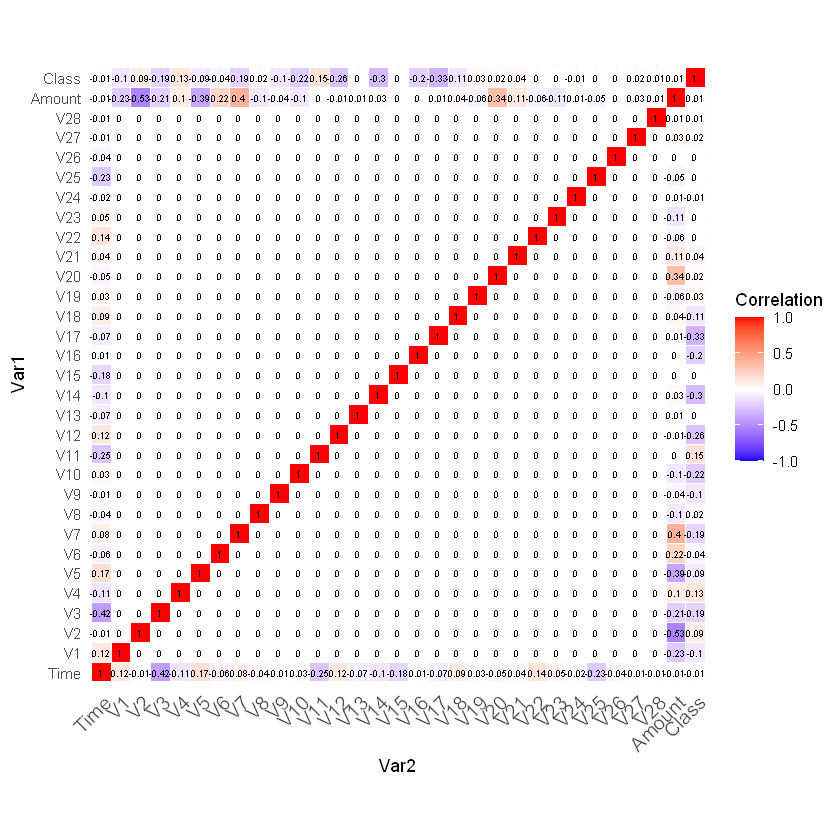

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


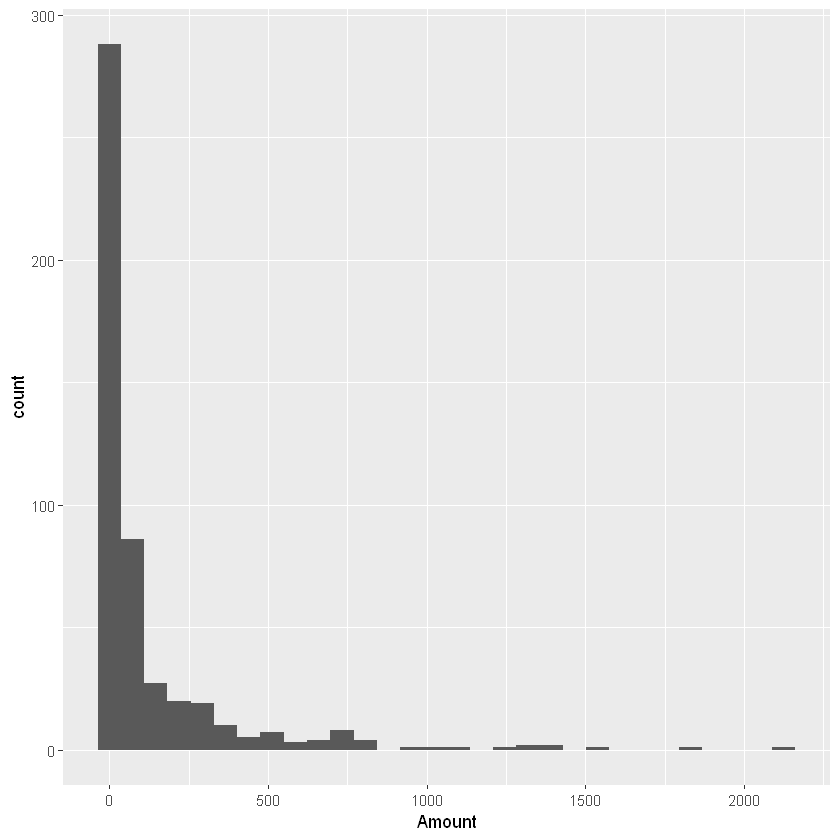



 Plotting the Fraud Transactions against Amount


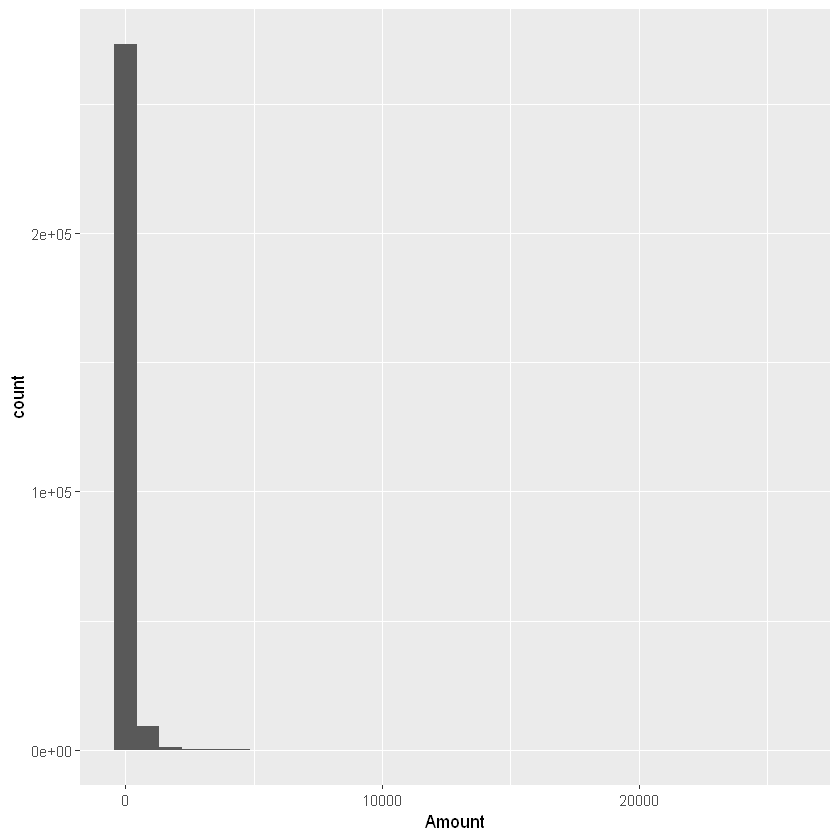



 Plotting the Non-Fraud Transactions against Amount


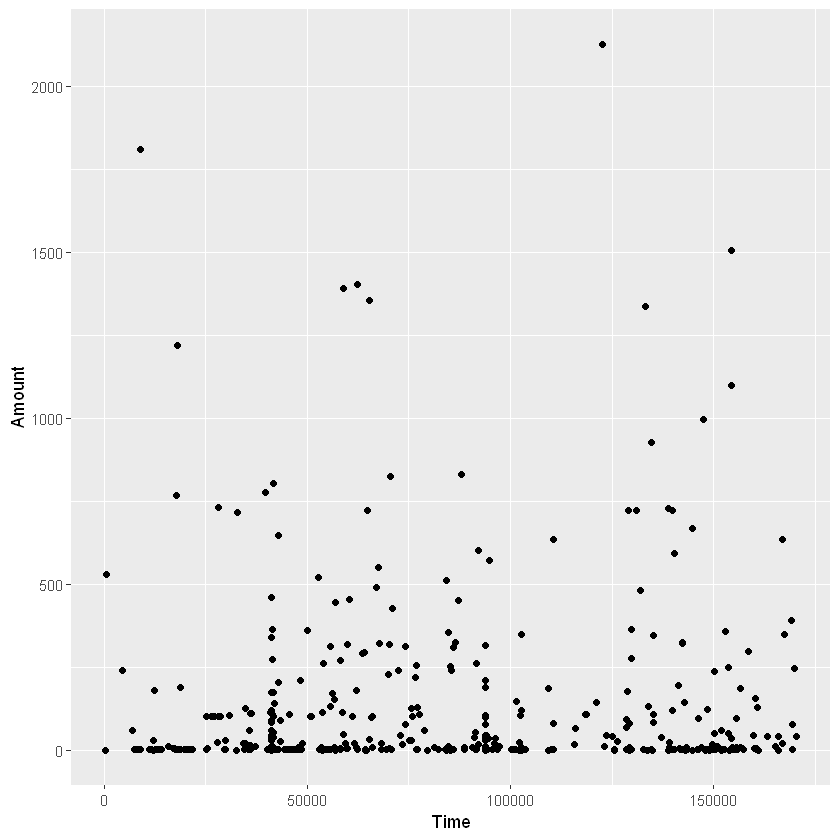

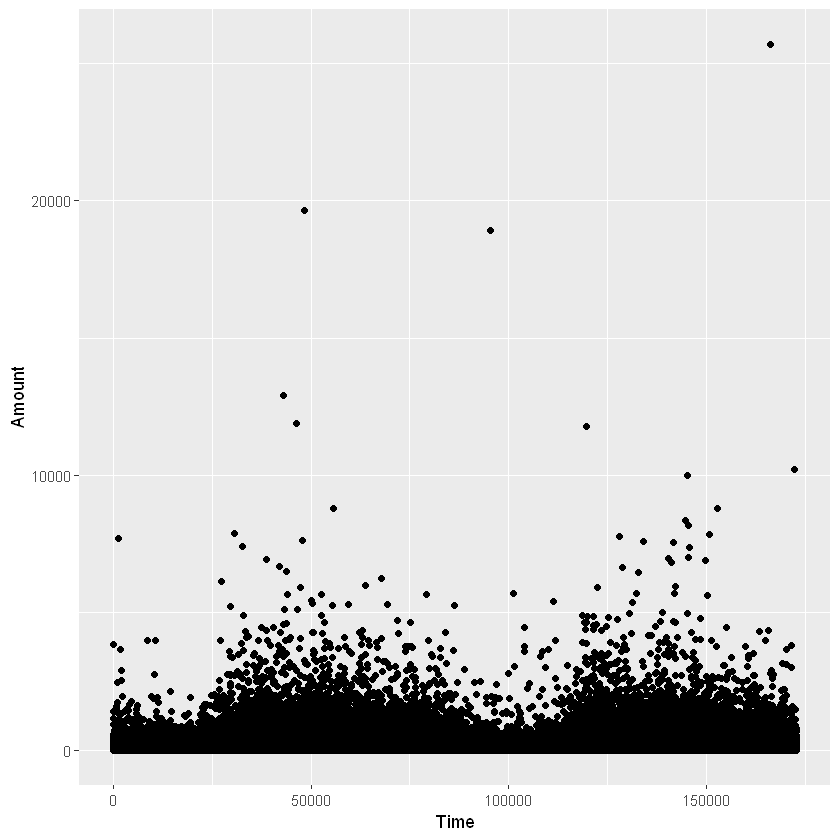

In [27]:
writeLines("\nEDA\n")
#EDA
mainEDA()




Total Number of Null Values =  0


Total Number of Duplicate Rows Removed :  1081
[1] "proportions of variance:"
 [1] 0.3792214568 0.0989406737 0.0692640489 0.0545701380 0.0512212376
 [6] 0.0404876073 0.0379242028 0.0360370770 0.0315578197 0.0280344675
[11] 0.0272241987 0.0233297916 0.0203606428 0.0181517419 0.0147391684
[16] 0.0132003101 0.0108819351 0.0087615711 0.0077439921 0.0057605841
[21] 0.0050476900 0.0040767623 0.0027583326 0.0027364072 0.0020234505
[26] 0.0018027140 0.0015313595 0.0013899609 0.0008783647 0.0003422930


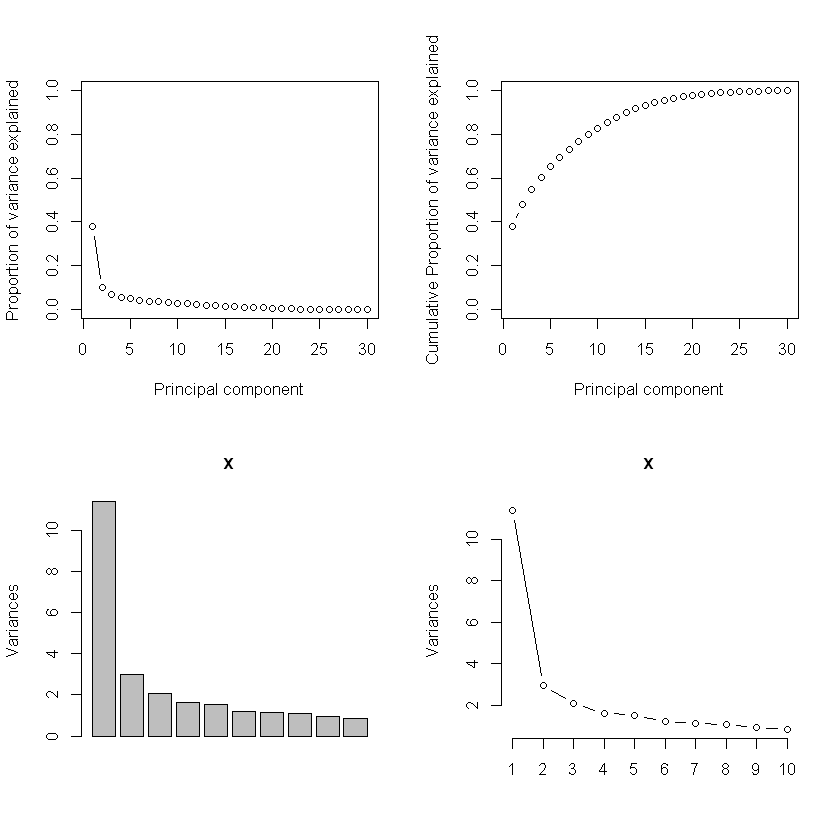

In [28]:
#Pre Processing
mainPreProcessing()

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.2893  -0.5084   0.0000   0.0155   3.1161  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.604311   0.035234  130.68   <2e-16 ***
PC1         -2.891769   0.017138 -168.74   <2e-16 ***
PC2          0.350742   0.010873   32.26   <2e-16 ***
PC3          0.579604   0.010608   54.64   <2e-16 ***
PC4         -0.594209   0.007607  -78.12   <2e-16 ***
PC5          0.438842   0.008133   53.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 552103  on 398257  degrees of freedom
Residual deviance: 187429  on 398252  degrees of freedom
AIC: 187441

Number of Fisher Scoring iterations: 9



 ROC-AUC -  Logistic Regression
[1] 1


Precision,Recall and F1-Score -  Logistic Regression
[1] "Precsion :  0.989359940382545"
[1] "Recall :  0.839600876011571"
[1] "F1-Score :  0.9083

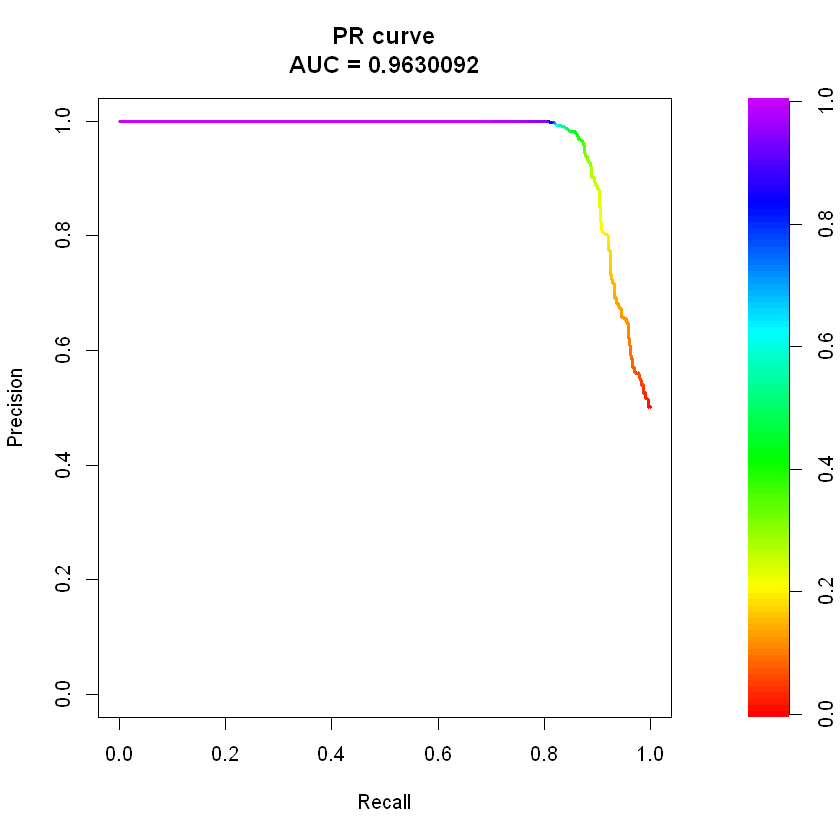

[1] 1


Precision,Recall and F1-Score -  Decisition Tree
[1] "Precsion :  0.969069733928969"
[1] "Recall :  0.866314544368581"
[1] "F1-Score :  0.914815730892901"


Confusion Matrix -  Decisition Tree
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 82933 11415
         1  2361 73972
                                         
               Accuracy : 0.9193         
                 95% CI : (0.918, 0.9206)
    No Information Rate : 0.5003         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8386         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.8663         
            Specificity : 0.9723         
         Pos Pred Value : 0.9691         
         Neg Pred Value : 0.8790         
             Prevalence : 0.5003         
         Detection Rate : 0.4334         
   De

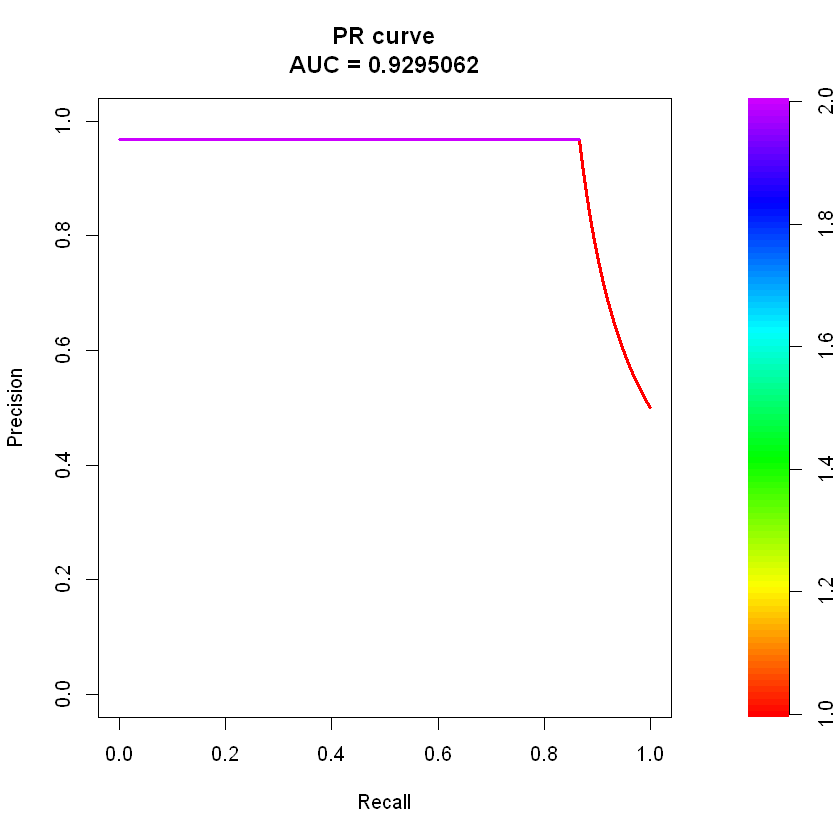

In [29]:
#Model Preparation and Results
mainModeling()


In [ ]:
# **************************************************
# End of Notebook 
# **************************************************